# Urban Air Pollution Challenge (Regression Analysis)

You may have seen recent news articles stating that air quality has improved due to **COVID-19**. This is true for some locations, but as always the truth is a little more complicated. In parts of many African cities, air quality seems to be getting worse as more people stay at home. **For this project, we’ll be digging deeper into the data, finding ways to track air quality and how it is changing, even in places without ground-based sensors**. This information will be especially useful in the face of the current crisis, since poor air quality makes a respiratory disease like **COVID-19 more dangerous**.

**We’ve collected weather data and daily observations from the Sentinel 5P satellite tracking various pollutants in the atmosphere**. Our goal is to use this information to predict **PM2.5 particulate matter concentration**(a common measure of air quality that normally requires ground-based sensors to measure) every day for each city. The data covers the last three months, spanning hundreds of cities across the globe.

In [5]:
# import the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)


# load the training and testing data 

train = pd.read_csv("c://Users//Collins//Desktop//Zindi//Urban Air Pollution Challange//Train.csv")
test = pd.read_csv("c://Users//Collins//Desktop//Zindi//Urban Air Pollution Challange//Test.csv")


# view the training data

train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [6]:
# view the testing data

test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.8

In [7]:
# Dimensions of each dataset

print('Shape of training dataset is', train.shape)
print('Shape of testing dataset is', test.shape)

Shape of training dataset is (30557, 82)
Shape of testing dataset is (16136, 77)


### Data Preprocessing

In [8]:
# make a copy of test data

processed_test = test.copy()

In [9]:
# check the number of columns for training data

train.isnull().sum()

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol

In [10]:
# check the number of columns for training data

test.isnull().sum()

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        1327
L3_NO2_NO2_slant_column_number_density                  1327
L3_NO2_absorbing_aerosol_index                          1327
L3_NO2_cloud_fraction                                   1327
L3_NO2_sensor_altitude                                  1327
L3_NO2_sensor_azimuth_angle                             1327
L3_NO2_sensor_zenith_angle                              1327
L3_NO2_solar_azimuth_ang

In [11]:
# type of data each columns contain

train.dtypes

Place_ID X Date                                         object
Date                                                    object
Place_ID                                                object
target                                                 float64
target_min                                             float64
target_max                                             float64
target_variance                                        float64
target_count                                             int64
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 

In [12]:
test.dtypes

Place_ID X Date                                         object
Date                                                    object
Place_ID                                                object
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 float64
L3_NO2_absorbing_aerosol_index                         float64
L3_NO2_cloud_fraction                                  float64
L3_NO2_sensor_altitude                                 float64
L3_NO2_sensor_azimuth_angle                            float64
L3_NO2_sensor_zenith_angle                             

In [13]:
# Drop columns with too much missing values

train.drop(columns=['Place_ID X Date','Place_ID','L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
                    'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 
                    'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
                    'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle',
                    'target_count', 'target_max', 'target_min', 'target_variance'], axis=1 ,inplace=True)


processed_test.drop(columns=['Place_ID X Date','Place_ID','L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
                    'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 
                    'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
                    'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1 ,inplace=True)



# fill all NAN values with their respective mean

cols = train.columns
train[cols] = train[cols].fillna(train.mean())

cols = processed_test.columns
processed_test[cols] = processed_test[cols].fillna(processed_test.mean())

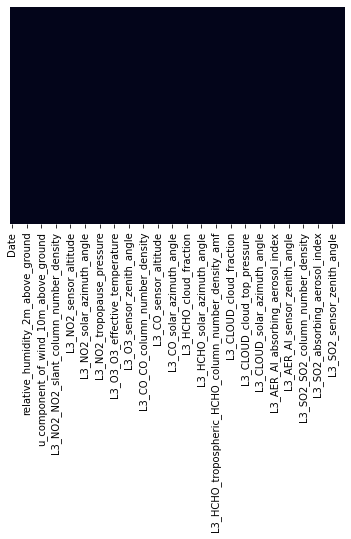

In [14]:
# Checking missing values for training data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

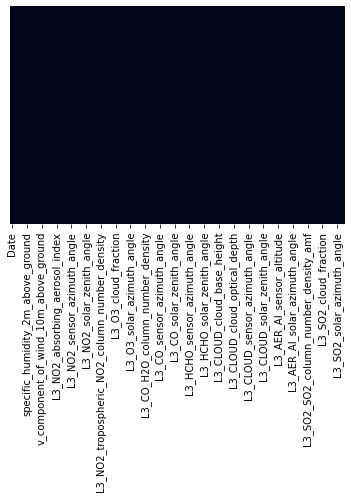

In [15]:
# Checking missing values for testing data

sns.heatmap(processed_test.isnull(), yticklabels=False, cbar=False)

In [16]:
# Dimensions of each dataset

print('Shape of training dataset is', train.shape)
print('Shape of testing dataset is', processed_test.shape)

Shape of training dataset is (30557, 69)
Shape of testing dataset is (16136, 68)


In [17]:
# handling the date column

train['Date'] = pd.to_datetime(train['Date'])
processed_test['Date'] = pd.to_datetime(processed_test['Date'])


train = train.assign(day=train.Date.dt.day, month=train.Date.dt.month, year=train.Date.dt.year)
processed_test = processed_test.assign(day=processed_test.Date.dt.day, month=processed_test.Date.dt.month, year=processed_test.Date.dt.year)

train.drop(columns=['Date'], axis=1 ,inplace=True)
processed_test.drop(columns=['Date'], axis=1 ,inplace=True)



# re-arranging the training and test columns

train = train[['day', 'month', 'year', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction', 'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle', 'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_NO2_tropopause_pressure', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature', 'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height', 'L3_CO_sensor_altitude',
       'L3_CO_sensor_azimuth_angle', 'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle', 'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_cloud_fraction', 'L3_HCHO_sensor_azimuth_angle', 'L3_HCHO_sensor_zenith_angle', 'L3_HCHO_solar_azimuth_angle', 'L3_HCHO_solar_zenith_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure', 'L3_CLOUD_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude', 'L3_AER_AI_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle', 'L3_AER_AI_solar_azimuth_angle', 'L3_AER_AI_solar_zenith_angle',
       'L3_SO2_SO2_column_number_density', 'L3_SO2_SO2_column_number_density_amf', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction', 'L3_SO2_sensor_azimuth_angle', 'L3_SO2_sensor_zenith_angle', 'L3_SO2_solar_azimuth_angle', 'L3_SO2_solar_zenith_angle', 'target']]



processed_test = processed_test[['day', 'month', 'year', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction', 'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle', 'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_NO2_tropopause_pressure', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature', 'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height', 'L3_CO_sensor_altitude',
       'L3_CO_sensor_azimuth_angle', 'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle', 'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_cloud_fraction', 'L3_HCHO_sensor_azimuth_angle', 'L3_HCHO_sensor_zenith_angle', 'L3_HCHO_solar_azimuth_angle', 'L3_HCHO_solar_zenith_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure', 'L3_CLOUD_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude', 'L3_AER_AI_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle', 'L3_AER_AI_solar_azimuth_angle', 'L3_AER_AI_solar_zenith_angle',
       'L3_SO2_SO2_column_number_density', 'L3_SO2_SO2_column_number_density_amf', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction', 'L3_SO2_sensor_azimuth_angle', 'L3_SO2_sensor_zenith_angle', 'L3_SO2_solar_azimuth_angle', 'L3_SO2_solar_zenith_angle']]


In [18]:
# view the training data

train.head()

,day,month,year,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,target
0,2,1,2020,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2510.989311,77491.774334,0.000000,18.201564,3286.134009,70799.498221,76.536426,38.593017,-61.752587,22.363665,0.226843,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,38.0
1,3,1,2020,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,39.0
2,4,1,2020,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319.860448,-103.494458,49.924556,-78.355069,34.308941,0.000027,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.000124,0.910536,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,-105.201338,49.839714,-78.342701,34.296977,0.307463,-1.001241,841410

In [19]:
# view the testing data

processed_test.head()

,day,month,year,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,2,1,2020,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019
1,3,1,2020,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116
2,4,1,2020,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.872276,-94.015418,14.140820,0.018736,944.341413,1281.892115,834751.987268,73.861680,56.019838,-94.001436,14.143972,0.000006,0.007113,75.552445,55.872276,-94.015418,14.140820,0.000042,1.680458,5188.524088,61477.291929,0.007849,6.415458,5797.742161,57757.842218,75.552445,55.872276,-94.015418,14.140820,0.279277,-0.254250,834839.050781,75.552445,55.872276,-94.015418,14.14

In [20]:
# Dimensions of each dataset

print('Shape of training dataset is', train.shape)
print('Shape of testing dataset is', processed_test.shape)

Shape of training dataset is (30557, 71)
Shape of testing dataset is (16136, 70)


We have completed the data preprocessing stage. Lets go ahead with data modeling

# Model

In [21]:
# selecting the dependent and independent variables

X = train.iloc[:, :-1].values
y = train.iloc[:, 70].values

In [22]:
# checking type of X and y

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
# checking shape of X and y

print(X.shape)
print(y.shape)

(30557, 70)
(30557,)


In [24]:
# supress warning sign

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [25]:
# split X and y into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [26]:
# rescale X_train and X_test

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [27]:
# print the shape of our new X objects

print(X_train.shape)
print(X_test.shape)

(24445, 70)
(6112, 70)


In [28]:
# print the shape of our new y objects

print(y_train.shape)
print(y_test.shape)

(24445,)
(6112,)


#### Using LightLGB Regression Algorithm

In [29]:
# import LightLGB Regression Algorithm
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=1000)

# fit the model
lgbm_model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000)

In [30]:
# Let’s measure this regression model’s RMSE
from sklearn.metrics import mean_squared_error

# make predictions on test data
LGB_pred = lgbm_model.predict(X_test)

In [31]:
lgbm_mse = mean_squared_error(y_test, LGB_pred)

In [32]:
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

29.18624840311116

#### Submission

In [38]:
# Get the predicted result for the test Data
test.target = lgbm_model.predict(processed_test)

In [39]:
submission = pd.DataFrame({"Place_ID": test["Place_ID"] + " X " + test["Date"], "target": test.target})

In [40]:
# Checking a sample submission

submission.sample(5)

,Place_ID,target
13776,VV7SGFI X 2020-03-10,29.031010
1970,6Q5AZWX X 2020-03-26,20.011720
9613,MN4JVH4 X 2020-03-27,49.426153
3714,A4Z5WHY X 2020-02-06,68.634980
11146,PP5RBWO X 2020-01-23,68.964814


In [41]:
# Exporting the sample data

submission.to_csv('c://Users//Collins//Desktop//test_data.csv', index=False)